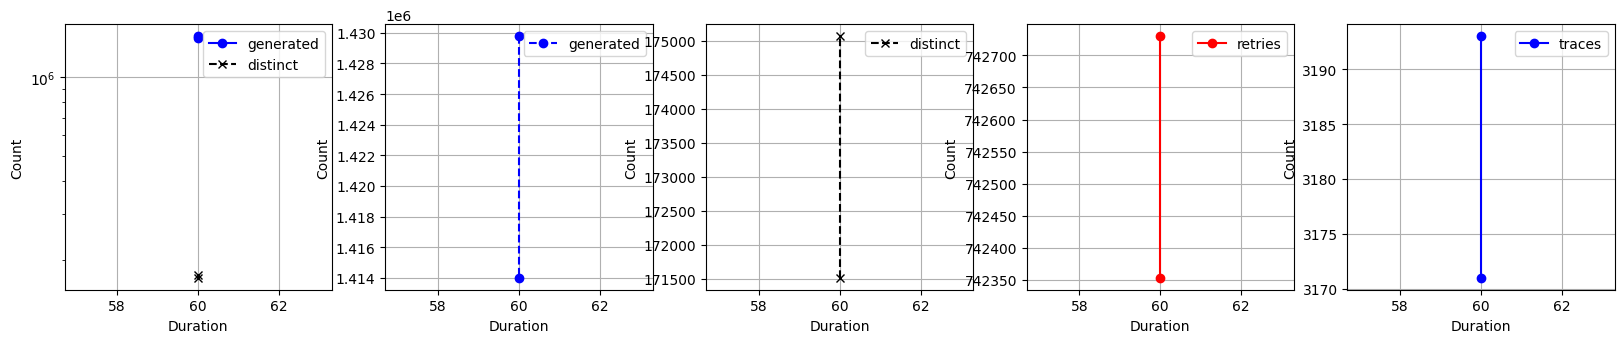

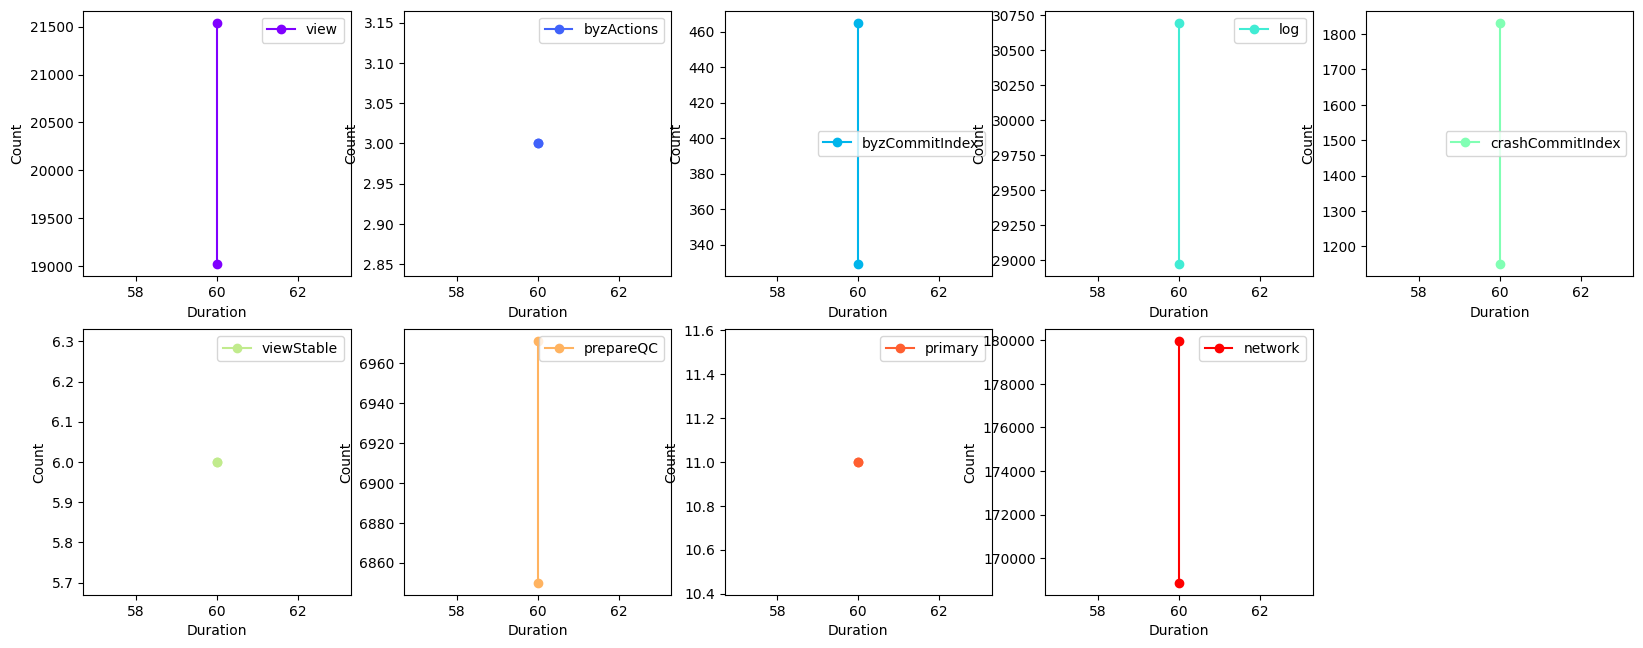

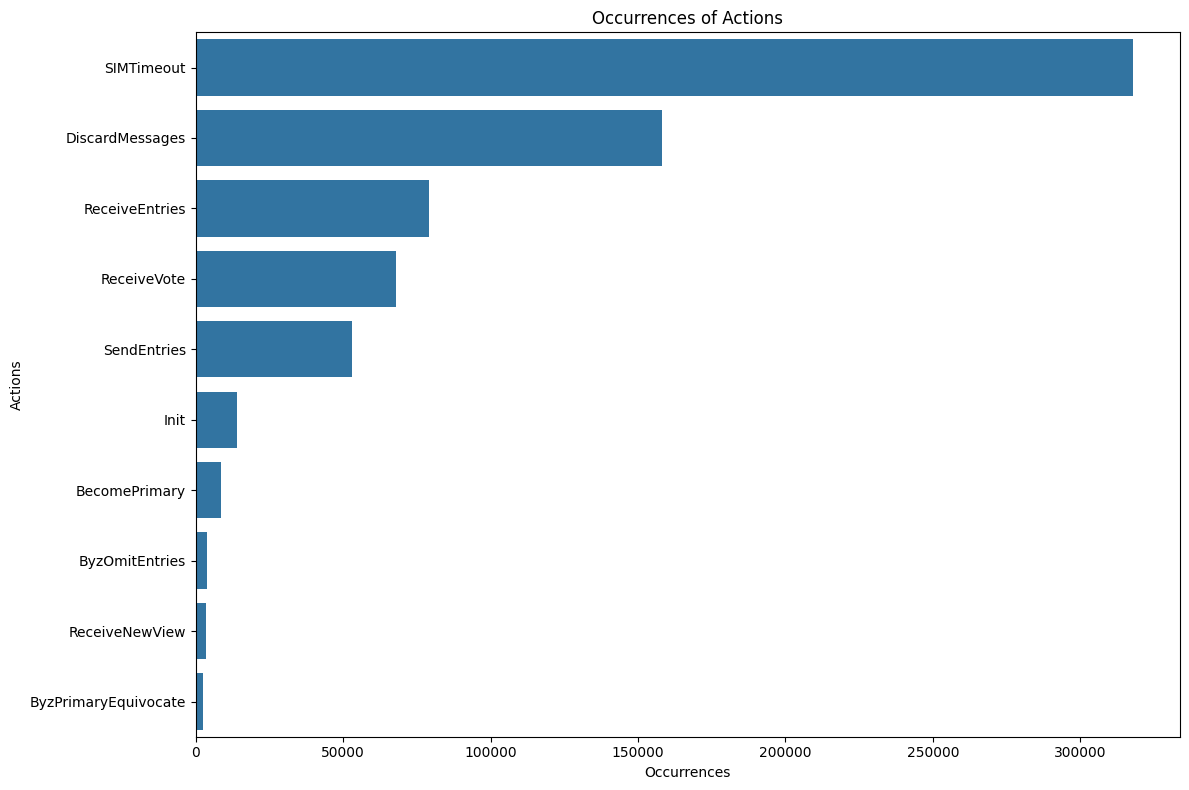

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import json
import numpy as np

# Load the data
data = []
with open('SIMpirateship.ndjson') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

### Scatter plots states, ...

plt.figure(figsize=(20, 20))

plt.subplot(5, 5, 1)
plt.plot(df['duration'], df['generated'], marker='o', linestyle='-', color='blue', label='generated')
plt.plot(df['duration'], df['distinct'], marker='x', linestyle='--', color='black', label='distinct')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.subplot(5, 5, 2)
plt.plot(df['duration'], df['generated'], marker='o', linestyle='--', color='blue', label='generated')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.grid(True)
plt.legend()

plt.subplot(5, 5, 3)
plt.plot(df['duration'], df['distinct'], marker='x', linestyle='--', color='black', label='distinct')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.grid(True)
plt.legend()

plt.subplot(5, 5, 4)
plt.plot(df['duration'], df['retries'], marker='o', linestyle='-', color='red', label='retries')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.grid(True)
plt.legend()

plt.subplot(5, 5, 5)
plt.plot(df['duration'], df['traces'], marker='o', linestyle='-', color='blue', label='traces')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.grid(True)
plt.legend()

plt.show()

### Scatter plots Variables

plt.figure(figsize=(20, 20))
i = 1
colors = cm.rainbow(np.linspace(0, 1, len(df['distinctvalues'].iloc[-1].keys())))
for value, color in zip(df['distinctvalues'].iloc[-1].keys(),colors):
    plt.subplot(5, 5, i)
    plt.plot(df['duration'], df['distinctvalues'].apply(lambda x: x.get(value, None)), marker='o', linestyle='-', label=value, color=color)
    plt.xlabel('Duration')
    plt.ylabel('Count')
    plt.legend()
    i += 1
plt.show()

### Bar Plot of Action Occurrences

actions_df = pd.json_normalize(df['actions'])
actions_sum = actions_df.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=actions_sum.values, y=actions_sum.index)
plt.title('Occurrences of Actions')
plt.xlabel('Occurrences')
plt.ylabel('Actions')
plt.tight_layout()
plt.show()